#  **Spin coating** 

### __Before you start the notebook please run the import section bellow.__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from ipycanvas import Canvas
from base64 import b64encode
from IPython.display import display, HTML



**Spin coating** is a widely used technique in microfabrication processes that enables the deposition of thin films with precise control over their thickness and uniformity. It is a simple and efficient method that involves spinning a liquid or viscous material onto a substrate, which spreads and forms a thin film due to centrifugal forces. Note that before spin coating, a surface cleaning step can performed to remove contaminants, particles, and organic residues that could affect the quality of subsequent coatings or patterning steps



In [2]:
mp4 = open('spincoating_clip.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# *Exercice Section*
* # Thickness/rotation speed curves




The goal of this exercise is to deposite the resist and lift-off resist uniformly on the wafer, to prepare for the photolithography and lift-off steps.
To do so, the resist used is called ["AZ 1512 HS"](https://www.epfl.ch/research/facilities/cmi/process/photolithography/photoresist-selection/az-1512-hs/) and the lift-off resist (LOR) is the ["LOR 5A"](https://www.epfl.ch/research/facilities/cmi/process/photolithography/photoresist-selection/lor-5a/), both available in CMi. 
The thickness that you will deposite is crucial in order to achieve the next steps correctly.
The goal of this exercise is to generate the two curves of thickness T [$\mu m$] in function of the rotation speed $\omega$ [$rpm$], so that you can choose the correct parameters on the machine. Note that the recipe first begins with a 500 RPM spreading step of 5 seconds and then 40 seconds of the main coating step.
For the resists mentionned above, the relation between the two variables T and $\omega$ is simplified as :
\begin{equation}
T = \alpha \cdot \omega^\beta [\mu m]
\end{equation}

with $\alpha_{resist}$ = 94.67 and $\beta_{resist}$ = 0.52 and $\alpha_{LOR}$ = 34.41 and $\beta_{LOR}$ = 0.51

`Now, it's your turn to generate the thickness/rotation speed curve. To do so, run the following cell and analyze the different curves. If you want, you can change the values inside the arrays (1000, 2000, 3000, etc.), which correspond to the different rotation speeds of the machine`




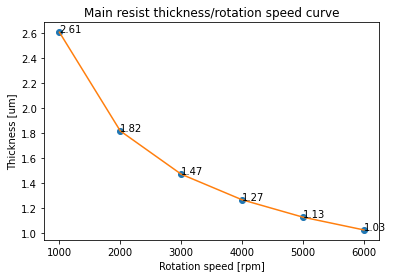

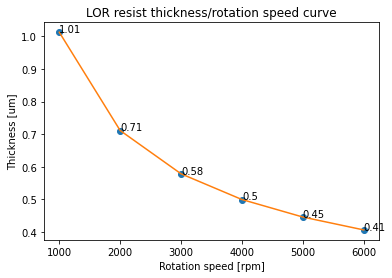

In [3]:
#Coefficients of the approximation
alpha_resist = 94.67
beta_resist = 0.52
alpha_LOR = 34.31
beta_LOR = 0.51

#Rpm values
omega_resist = np.array([1000, 2000, 3000, 4000, 5000, 6000])
omega_LOR = np.array([1000, 2000, 3000, 4000, 5000, 6000])

#Interpolation
t_resist = alpha_resist*(omega_resist**-beta_resist)
t_LOR = alpha_LOR*(omega_LOR**-beta_LOR)
interp_resist = interpolate.interp1d(omega_resist,t_resist)
interp_LOR = interpolate.interp1d(omega_LOR,t_LOR)

#Plots
for i,j in zip(omega_resist, t_resist):
    plt.text(i, j, round(float(j),2))

plt.title('Main resist thickness/rotation speed curve')
plt.plot(omega_resist, interp_resist(omega_resist), 'o', omega_resist, t_resist)
plt.xlabel('Rotation speed [rpm]')
plt.ylabel('Thickness [um]')
plt.show()
for i,j in zip(omega_LOR, t_LOR):
    plt.text(i, j, round(float(j),2))
plt.title('LOR resist thickness/rotation speed curve')
plt.plot(omega_LOR, interp_LOR(omega_LOR), 'o', omega_LOR, t_LOR)
plt.xlabel('Rotation speed [rpm]')
plt.ylabel('Thickness [um]')
plt.show()



`Based on the plot above, what rpm would you choose ?`


In [4]:
#Determine your rotation speeds for each resist 
omega_resist = 3000 #rpm
omega_LOR = 1000    #rpm

In [5]:
#creation of the substrate
canvas = Canvas(size=(500, 500))
canvas.fill_text('Si wafer', 580, 130)
canvas.fill_text('Oxidation layer ~2um', 580, 95)
height_LOR = round(alpha_LOR*(omega_LOR**-beta_LOR),2)
height_resist = round(alpha_resist*(omega_resist**-beta_resist),2)
canvas.fill_text('Lift-off resist ' + str(height_LOR) + ' um', 580, 85- 10*alpha_LOR*(omega_LOR**-beta_LOR))
canvas.fill_text('Main resist ' + str(height_resist) + ' um', 580, 65- 10*alpha_LOR*(omega_LOR**-beta_LOR))
canvas.stroke_style = 'black'
canvas.fill_rect(350, 100, 200, 50) #x, y, width, height
canvas.stroke_rect(350, 100, 200, 50)

#creation of the oxide layer
canvas.fill_style = '#d3d3d3'
canvas.stroke_style = '#d3d3d3'
canvas.fill_rect(350, 78, 200, 22) #x, y, width, height
canvas.stroke_rect(350, 78, 200, 22)

#creation of the LOR resist in function of the thickness that has been deposited
canvas.stroke_style = 'black'
canvas.fill_style = 'rgb(130, 200, 130)'  # Slightly more intense green fill color
canvas.stroke_style = 'rgb(130, 200, 130)'  # Slightly more intense green stroke color
canvas.fill_rect(350, 78- 10*alpha_LOR*(omega_LOR**-beta_LOR), 200,  10*alpha_LOR*(omega_LOR**-beta_LOR)) #x, y, width, height
canvas.stroke_rect(350,950, 200, 50)

#creation of the main resist in function of the thickness that has been deposited
canvas.fill_style = 'rgb(130, 160, 200)'  # Slightly darker blue fill color
canvas.stroke_style = 'rgb(130, 160, 200)'  # Slightly darker blue stroke color
canvas.fill_rect(350, 78- 10*alpha_resist*(omega_resist**-beta_resist)-10*alpha_LOR*(omega_LOR**-beta_LOR), 200,  10*alpha_resist*(omega_resist**-beta_resist)) #x, y, width, height
canvas.stroke_rect(350,950, 200, 50)

#display the result
canvas

Canvas()

## __This is the end of the spin coating section.__
## __Please go back to the main notebook and fill the required data from what you found here.__
## __You can go to the next notebook "lithography".__

